# Projet IOT 
## Où se trouve notre code ?
Dans ce notebook se trouve le code essentiellement dédié au traitement des données: <br />
    -> Prise des données météo d'OpenWeather<br />
    -> Abonnement au broker TTN avec paho-mqtt et réception des données<br />
    -> Carte de la France avec données météo OpenWeather<br />
    -> "Publish" avec mosquitto_pub<br />

Dans le dossier riot/lorawan/ttn-sensors se trouve le code et les infos pour compiler et flasher les boards.

### PROGRAMME PYTHON POUR PRENDRE LES PRESSIONS DE QUELQUES VILLES FRANCAISES

In [11]:
# Python program to find current
# weather details of any city
# using openweathermap api
# import required modules
import requests, json
import os
api_key = "05b51f50c88c882398ed44144e86224f"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

complete_url = base_url + "q=" + 'Saclay' + "&appid=" + api_key
response = requests.get(complete_url)
x = response.json()
if x["cod"] != "404":
    y = x["main"]
    tempSaclay = y["temp"]
    pressSaclay = y["pressure"]
    humidSaclay = y["humidity"]
    z = x["weather"]
    weather_description = z[0]["description"]
else:
    print(" City Not Found ")
    
complete_url = base_url + "q=" + 'Marseille' + "&appid=" + api_key
response = requests.get(complete_url)
x = response.json()
if x["cod"] != "404":
    y = x["main"]
    tempMarseille = y["temp"]
    pressMarseille = y["pressure"]
    humidMarseille = y["humidity"]
else:
    print(" City Not Found ")
    
complete_url = base_url + "q=" + 'Lille' + "&appid=" + api_key
response = requests.get(complete_url)
x = response.json()
if x["cod"] != "404":
    y = x["main"]
    pressLille = y["pressure"]
else:
    print(" City Not Found ")
    

### ICI LE CODE POUR S'ABONNER AUX DONNEES VENANT DU SERVEUR MQTT DE TTN

In [13]:
import paho.mqtt.client as mqtt
import json
import base64
import re

valPressionDevice1 = 1
valPressionDevice2 = 2

PSW = 'NNSXS.Z73HJOZDGASSNLZALUGMK3BZCQHFERGYYKQDLMQ.DRNU23S2HH3LPQ2B6XCIWYOH3ZYLWMX2SON7RHNA6TPHLI3UVCHA'

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print('Connected with result code ' + str(rc))
    client.subscribe('v3/+/devices/+/up')
 
# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):    
    print(f"Received `{msg.payload.decode()}` from `{msg.topic}` topic")
    resultat = json.loads(msg.payload.decode())
    
    device = resultat['end_device_ids']
    deviceTTN = device['device_id']
    print(deviceTTN)
    
    if(deviceTTN == 'eui-70b3d57ed004c6f7'):
        uplink_message = resultat['uplink_message']
        payload_final = uplink_message['frm_payload']
        print(payload_final)
        print(base64.b64decode(payload_final))
        valeurPressionDevice1 = re.findall(r'\d+', base64.b64decode(payload_final).decode("utf-8"))
        
        print(valeurPressionDevice1)
        print(type(valeurPressionDevice1))
        valeurPressionDevice1 = int(valeurPressionDevice1[0])
        print(valeurPressionDevice1)
        print(type(valeurPressionDevice1))
        valPressionDevice1 = valeurPressionDevice1
        %store valPressionDevice1
        
    else:
        uplink_message = resultat['uplink_message']
        payload_final = uplink_message['frm_payload']
        print(payload_final)
        print(base64.b64decode(payload_final))
        valeurPressionDevice2 = re.findall(r'\d+', base64.b64decode(payload_final).decode("utf-8"))
        
        print(valeurPressionDevice2)
        print(type(valeurPressionDevice2))
        valeurPressionDevice2 = int(valeurPressionDevice2[0])
        print(valeurPressionDevice2)
        print(type(valeurPressionDevice2))
        valPressionDevice2 = valeurPressionDevice2
        %store valPressionDevice2
    
 
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.tls_set()
client.username_pw_set('app-test-ttn',PSW)
 
client.connect('eu1.cloud.thethings.network', 8883, 60)
 
client.loop_forever()

Connected with result code 0
Received `{"end_device_ids":{"device_id":"eui-70b3d57ed004d300","application_ids":{"application_id":"app-test-ttn"},"dev_eui":"70B3D57ED004D300","join_eui":"0000000000000000","dev_addr":"260BE3AB"},"correlation_ids":["as:up:01FYVJDVZYAA2DM5VGC2D9T78P","gs:conn:01FYVDH2X6BCG98GVJZ111QC2G","gs:up:host:01FYVDH2XGYXAG0QYSHPZD8QVN","gs:uplink:01FYVJDVS34JPWC6CJ0F4SJZVY","ns:uplink:01FYVJDVS4XV8JVXVCTAH7A985","rpc:/ttn.lorawan.v3.GsNs/HandleUplink:01FYVJDVS4X0KVR655FNJKD7Z4","rpc:/ttn.lorawan.v3.NsAs/HandleUplink:01FYVJDVZXFG5W5TY4BHG5D7FW"],"received_at":"2022-03-23T14:20:56.702241416Z","uplink_message":{"session_key_id":"AX+3JeybixO2n40etnvzag==","f_port":2,"f_cnt":2,"frm_payload":"UHJlc3Npb246IDc1N21tSGc=","decoded_payload":{"message":"Pression: 757mmHg"},"rx_metadata":[{"gateway_ids":{"gateway_id":"iot-lab-saclay-gateway"},"time":"2022-03-23T14:20:56Z","timestamp":853856628,"rssi":-81,"channel_rssi":-81,"snr":10,"location":{"latitude":48.71503122196953,"longi

KeyboardInterrupt: 

#### EXEMPLE DE SORTIE:

Received `{"end_device_ids":{"device_id":"eui-70b3d57ed004c6f7","application_ids":{"application_id":"app-test-ttn"},"dev_eui":"70B3D57ED004C6F7","join_eui":"0000000000000000","dev_addr":"260B194E"},"correlation_ids":["as:up:01FYTZK05PCPPT84W8N7N61QW9","gs:conn:01FYTYA91A78T5MG4NZS24H1P8","gs:up:host:01FYTYA91HBVRMEPG93857KJP5","gs:uplink:01FYTZJZZ3CGD971V7393TQB25","ns:uplink:01FYTZJZZ4BK1EY3Q7YKJ79MSB","rpc:/ttn.lorawan.v3.GsNs/HandleUplink:01FYTZJZZ3Z1WYA1VQKV17M0RS","rpc:/ttn.lorawan.v3.NsAs/HandleUplink:01FYTZK05NVJ1E7S053V4HSEH6"],"received_at":"2022-03-23T08:51:41.878117674Z","uplink_message":{"session_key_id":"AX+19UaeK7Y0bHnfZaIXmA==","f_port":2,"f_cnt":9,"frm_payload":"UHJlc3Npb246IDc1OW1tSGc=","decoded_payload":{"message":"Pression: 759mmHg"},"rx_metadata":[{"gateway_ids":{"gateway_id":"iot-lab-saclay-gateway"},"time":"2022-03-23T08:51:41Z","timestamp":1345720140,"rssi":-89,"channel_rssi":-89,"snr":13.75,"location":{"latitude":48.71503122196953,"longitude":2.205945253372193,"altitude":157,"source":"SOURCE_REGISTRY"},"uplink_token":"ChoKGAoWaW90LWxhYi1zYWNsYXktZ2F0ZXdheRDMntiBBRoMCJ2/65EGEPG5kb4CIOCBr5mVJw=="}],"settings":{"data_rate":{"lora":{"bandwidth":125000,"spreading_factor":9}},"coding_rate":"4/5","frequency":"867100000","timestamp":1345720140},"received_at":"2022-03-23T08:51:41.668161580Z","confirmed":true,"consumed_airtime":"0.226304s","network_ids":{"net_id":"000013","tenant_id":"ttn","cluster_id":"ttn-eu1"}}}` from `v3/app-test-ttn@ttn/devices/eui-70b3d57ed004c6f7/up` topic
eui-70b3d57ed004c6f7
UHJlc3Npb246IDc1OW1tSGc=
b'Pression: 759mmHg'
['759']

On peut bien retrouver la pression

Commande pour s'abonner au broker mqtt avec mosquitto 

Dans une cellule pour générer le certificat: 

In [ ]:
!wget https://letsencrypt.org/certs/isrgrootx1.pem

Dans un terminal: 

In [ ]:
mosquitto_sub -h eu1.cloud.thethings.network --cafile riot/lorawan/ttn-mqtt/isrgrootx1.pem -p 8883 -t 'v3/+/devices/+/up' -u 'app-test-ttn@ttn' -P 'NNSXS.Z73HJOZDGASSNLZALUGMK3BZCQHFERGYYKQDLMQ.DRNU23S2HH3LPQ2B6XCIWYOH3ZYLWMX2SON7RHNA6TPHLI3UVCHA' -v

### CODE POUR AFFICHER LES DONNEES SUR UNE CARTE

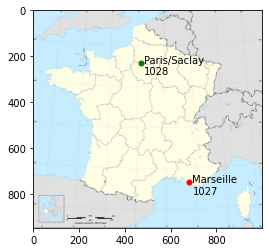

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#import PIL.Image

image = mpimg.imread("carte_france.png")

plt.imshow(image)
plt.plot(470, 230, "og", markersize=5)  # og: point vert
plt.text(485,230,'Paris/Saclay',horizontalalignment='left')
plt.text(485,280,str(pressSaclay),horizontalalignment='left')

plt.plot(680, 750, "or", markersize=5)
plt.text(695,750,'Marseille',horizontalalignment='left')
plt.text(695,800, str(pressMarseille),horizontalalignment='left')

plt.show()

### CODE POUR PUBLIER SUR LE BROKER MQTT
Downlink vers les cartes

In [41]:
# Ne marche pas à modifier

import base64

valeurPressionDevice2 = valeurPressionDevice2 * 1.33322
difference = pressSaclay - valeurPressionDevice2
message = "Différence de "+ str(difference) +"avec la valeur réelle"

print(base64.b64encode(message).decode())

TypeError: a bytes-like object is required, not 'str'

In [14]:
# Précedemment je stocke mes données avec %store
# Maintenant je veux les ressortir mais ça ne marche pas

%store -z
print(valPressionDevice1)

print(valPressionDevice2)

1
2


In [50]:
# Message du "downlink" à générer à la main

import base64

payload = b"Recalibration !!!"

print(base64.b64encode(payload).decode())

UmVjYWxpYnJhdGlvbiAhISE=


In [ ]:
Commande Terminal pour envoyer sur notre première device
mosquitto_pub -h eu1.cloud.thethings.network --cafile riot/lorawan/ttn-sensors/isrgrootx1.pem -p 8883 -t 'v3/app-test-ttn@ttn/devices/eui-70b3d57ed004c6f7/down/push' -u 'app-test-ttn@ttn' -P 'NNSXS.Z73HJOZDGASSNLZALUGMK3BZCQHFERGYYKQDLMQ.DRNU23S2HH3LPQ2B6XCIWYOH3ZYLWMX2SON7RHNA6TPHLI3UVCHA' -m '{"downlinks":[{"f_port": 42,"frm_payload":"UmVjYWxpYnJhdGlvbiAhISE=","priority": "NORMAL"}]}'


In [ ]:
Commande Terminal pour envoyer sur notre deuxième device

mosquitto_pub -h eu1.cloud.thethings.network --cafile riot/lorawan/ttn-sensors/isrgrootx1.pem -p 8883 -t 'v3/app-test-ttn@ttn/devices/eui-70b3d57ed004d300/down/push' -u 'app-test-ttn@ttn' -P 'NNSXS.Z73HJOZDGASSNLZALUGMK3BZCQHFERGYYKQDLMQ.DRNU23S2HH3LPQ2B6XCIWYOH3ZYLWMX2SON7RHNA6TPHLI3UVCHA' -m '{"downlinks":[{"f_port": 42,"frm_payload":"QUhBSEFIQUg=","priority": "NORMAL"}]}'